# Logistic Regression and Natural Language Processing (Spam/Ham Prediction)

## Penjelasan

### Tujuan

Membuat model yang dapat memprediksi pesan email yang didapatkan apakah termasuk email asli (Ham) atau email Spam (Spam). Model juga ditekankan agar mendapatkan presisi tinggi supaya pesan asli (Ham) tidak masuk ke dalam kategori Spam (Spam)

### Kolom

- Category = Kategori pesan spam/ham
- Message = Isi dari pesan email

## A. Data Preparation

### A.1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

list_stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

kamus_singkatan = {
    "u": "you", "ur": "your", "r": "are", "n": "and", "d": "the",
    "b4": "before", "c": "see", "lol": "laughing out loud",
    "txt": "text", "2": "to", "4": "for", "wif": "with", "oni": "only",
    "dun": "done", "thk": "think"
}

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nahls\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nahls\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nahls\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### A.2 Load Data

In [2]:
try:
    df = pd.read_csv('email.csv')
    print("Berhasil membaca csv")
except Exception as e:
    print("Gagal membaca data")

Berhasil membaca csv


### A.3 Melihat 5 Data Teratas dan 5 Data Terbawah

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.tail()

,Category,Message
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name
5572,"{""mode"":""full""",isActive:false}


### A.4 Melihat Informasi Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### A.5 Melihat Dimensi Data

In [6]:
df.shape

(5573, 2)

### A.6 Cek Data Duplikat

In [7]:
df.duplicated().sum()

np.int64(415)

In [8]:
df.drop_duplicates(inplace=True)

### A.7 Cek Data Hilang

In [9]:
df.isna().sum()

Category    0
Message     0
dtype: int64

## B. Data Preprocessing

### B.1 Cek Label

In [10]:
df['Category'].value_counts()

Category
ham               4516
spam               641
{"mode":"full"       1
Name: count, dtype: int64

In [11]:
valid_categories = ['ham', 'spam']
df = df[df['Category'].isin(valid_categories)].copy()

In [12]:
df['Category'].value_counts()

Category
ham     4516
spam     641
Name: count, dtype: int64

### B.2 Text Preprocessing

#### Linguistic Processing (Bahasa Inggris)

In [13]:
def linguistic_processing_english(list_of_words):
    clean_words = []
    for word in list_of_words:
        
        # 1. Normalisasi Singkatan
        word = kamus_singkatan.get(word, word)
        
        # 2. Stopword Removal
        if word not in list_stopwords:
            
            # 3. Lemmatization
            lemma_word = lemmatizer.lemmatize(word)
            clean_words.append(lemma_word)
            
    return " ".join(clean_words)

#### Preprocess Text

In [14]:

def preprocess_text(text_series):
    # 1. Case Folding/Normalization (Jadikan huruf kecil)
    # 2. Text Cleaning (Hapus angka/simbol aneh)
    # 3. Remove Punctuation (Hapus tanda baca)
    # 4. Tokenization (Split jadi list kata)
    temp_tokens = text_series.str.lower().str.replace(r'[^a-z\s]', ' ', regex=True).str.split()
    
    # Linguistic Processing Bahasa Inggris (NLTK)
    return temp_tokens.apply(linguistic_processing_english)

df['clean_message'] = preprocess_text(df['Message'])

In [15]:
df['clean_message'].head()

0    go jurong point crazy available bugis great wo...
1                                        ok lar joking
2    free entry wkly comp win fa cup final tkts st ...
3                   done say early hor see already say
4                  nah think go usf life around though
Name: clean_message, dtype: object

## C. Exploratory Data Analysis (EDA)

### C.1 Visualisasi Label

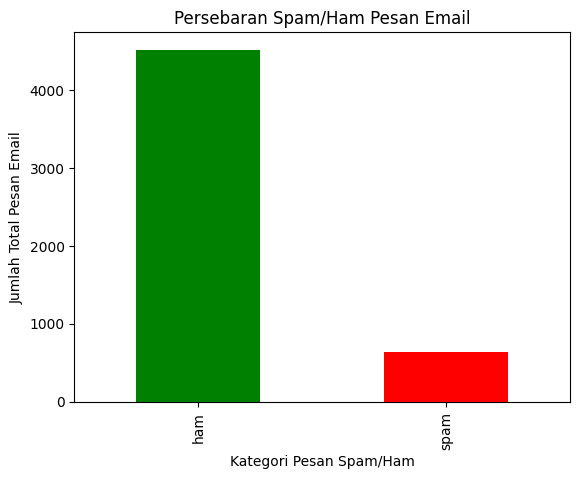

In [16]:
df['Category'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Persebaran Spam/Ham Pesan Email")
plt.xlabel("Kategori Pesan Spam/Ham")
plt.ylabel("Jumlah Total Pesan Email")
plt.show()

In [17]:
df['Category'].value_counts(normalize=True * 100)

Category
ham     0.875703
spam    0.124297
Name: proportion, dtype: float64

In [18]:
def top_words(text_series, n=10):
    all_text = " ".join(text_series)
    word_list = all_text.split()
    top_words = pd.Series(word_list).value_counts().head(n)
    return top_words

Text(0.5, 1.0, 'Top 10 Kata SPAM')

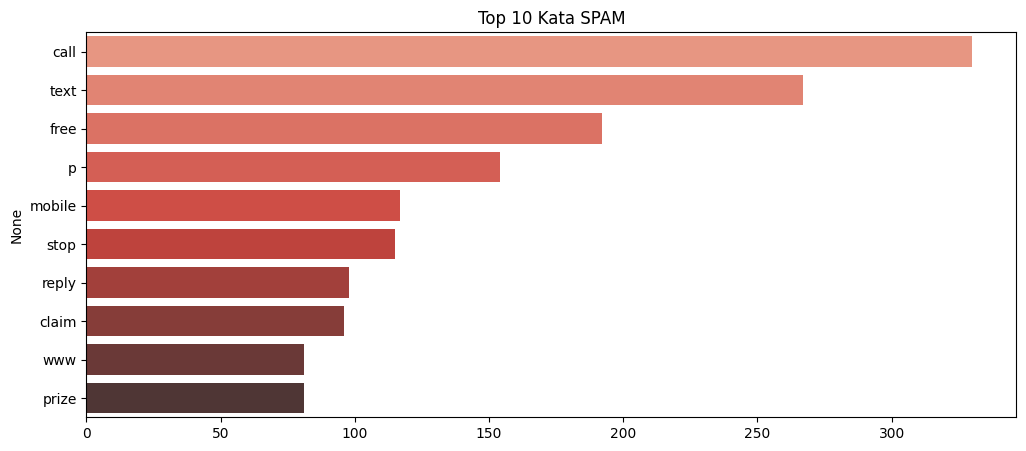

In [19]:
plt.figure(figsize=(12, 5))
spam_data = top_words(df[df['Category'] == 'spam']['clean_message'], 10)
sns.barplot(x=spam_data.values, y=spam_data.index, hue=spam_data.index, palette='Reds_d', legend=False)
plt.title('Top 10 Kata SPAM')

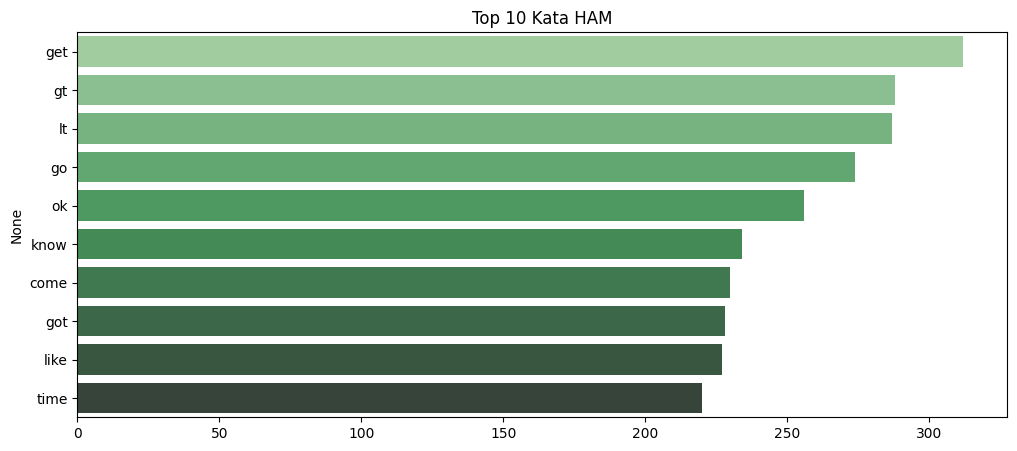

In [20]:
plt.figure(figsize=(12, 5))
ham_data = top_words(df[df['Category'] == 'ham']['clean_message'], 10)
sns.barplot(x=ham_data.values, y=ham_data.index, hue=spam_data.index, palette='Greens_d', legend=False)
plt.title('Top 10 Kata HAM')
plt.show()

## D. Feature Engineering

### D.1 Encoding/Mapping

In [21]:
df['Category'].unique()

array(['ham', 'spam'], dtype=object)

In [22]:
category_mapping = {'ham' : 0, 'spam' : 1}
df['Category'] = df['Category'].map(category_mapping)

In [23]:
df['Category'].unique()

array([0, 1])

In [24]:
df.head()

,Category,Message,clean_message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis great wo...
1,0,Ok lar... Joking wif u oni...,ok lar joking
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,0,U dun say so early hor... U c already then say...,done say early hor see already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though


## E. Modelling

### E.1 Defining X (Feature) and y (Target) Variables

In [25]:
X_data = df['clean_message']
y_data = df['Category']

### E.2 Splitting Data Training and Data Testing (80:20)

In [26]:
def stratified_split(X_data, y_data, train_size=0.8, random_state=42, frac=None):
    np.random.seed(random_state)
    
    if frac:
        X_data = X_data.sample(frac=frac, random_state=random_state)
        y_data = y_data.loc[X_data.index]
        
    X_train_list, X_test_list = [],[]
    y_train_list, y_test_list = [],[]
    
    for class_value in np.unique(y_data):
        class_idx = np.where(y_data==class_value)[0]
        
        idx = np.random.permutation(class_idx)
        split_ratio = int(len(idx) * train_size)
        
        X_train_list.append(X_data.iloc[idx[:split_ratio]])
        X_test_list.append(X_data.iloc[idx[split_ratio:]])
        y_train_list.append(y_data.iloc[idx[:split_ratio]])
        y_test_list.append(y_data.iloc[idx[split_ratio:]])
        
    X_train = pd.concat(X_train_list).reset_index(drop=True)
    X_test = pd.concat(X_test_list).reset_index(drop=True)
    y_train = pd.concat(y_train_list).reset_index(drop=True)
    y_test = pd.concat(y_test_list).reset_index(drop=True)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = stratified_split(X_data, y_data)

### E.3 Resampling Train Data

In [27]:
train_data = pd.DataFrame({'Message': X_train, 'Category': y_train})

major_label = train_data[train_data['Category'] == 0]
minor_label = train_data[train_data['Category'] == 1]

target_label = len(major_label)

minor_label_oversampled = minor_label.sample(n=target_label, replace=True, random_state=42)

train_balanced = pd.concat([major_label, minor_label_oversampled])
train_balanced.shape

(7224, 2)

### E.4 Defining Balanced X (Feature) and y (Target) Variables

In [28]:
X_train_clean = preprocess_text(train_balanced['Message'])
X_test_clean = preprocess_text(X_test)

y_train = train_balanced['Category'].values
y_test = y_test.values

### E.5 TF - IDF Formulas

#### Membangun Kamus/Vocabulary

In [29]:
def build_vocabulary(text_series):
    # Gabung semua teks & ambil kata unik
    all_text = " ".join(text_series)
    unique_words = set(all_text.split())
    
    # Urutkan & beri nomor index
    vocab_index = {word: i for i, word in enumerate(sorted(list(unique_words)))}
    return vocab_index

#### Menghitung TF (Term Frequency)

In [30]:
def calculate_tf(text_series, vocab_index):
    n_docs = len(text_series)
    n_vocab = len(vocab_index)
    
    # Matriks Kosong untuk TF
    tf_matrix = np.zeros((n_docs, n_vocab))
    
    for row, text in enumerate(text_series):
        words = text.split()
        for w in words:
            # Jika kata ada di kamus, tambahkan hitungannya (+1)
            if w in vocab_index:
                col_idx = vocab_index[w]
                tf_matrix[row, col_idx] += 1
                
    return tf_matrix

#### Menghitung IDF (Inverse Document Frequency)

In [31]:
def calculate_idf(text_series, vocab_index):
    n_docs = len(text_series)
    vocab_list = list(vocab_index.keys())
    
    # Hitung DF (Document Frequency)
    df_counts = dict.fromkeys(vocab_list, 0)
    for text in text_series:
        unique_words_in_sms = set(text.split()) # Kata unik per SMS
        for word in unique_words_in_sms:
            if word in df_counts:
                df_counts[word] += 1
    
    # Hitung Rumus IDF
    idf_values = {}
    for word, count in df_counts.items():
        # Rumus: log(Total Dokumen / (Jumlah Dokumen yg punya kata itu + 1))
        idf_values[word] = np.log(n_docs / (count + 1))
        
    return idf_values

#### Menghitung TF-IDF

In [32]:
def multiply_tf_idf(tf_matrix, vocab_index, idf_values):
    # Kita copy dulu matriks TF biar aslinya gak berubah
    tfidf_matrix = tf_matrix.copy()
    
    # Ambil jumlah baris dan kolom
    n_docs, n_vocab = tfidf_matrix.shape
    
    # Lakukan Perkalian: TF * IDF
    # Kita loop per kolom (per kata)
    for word, col_idx in vocab_index.items():
        idf_score = idf_values[word]
        
        # Kalikan seluruh kolom tersebut dengan nilai IDF-nya
        tfidf_matrix[:, col_idx] = tfidf_matrix[:, col_idx] * idf_score
        
    return tfidf_matrix

#### Menjalankan Semua Methods TF-IDF + Normalisasi

In [33]:
def normalize_l2(matrix):
    norms = np.sqrt(np.sum(matrix**2, axis=1, keepdims=True))
    norms[norms == 0] = 1
    return matrix / norms

In [34]:
# 1. Bikin Kamus
vocab_index = build_vocabulary(X_train_clean)

# 2. Hitung IDF
idf_values = calculate_idf(X_train_clean, vocab_index)

# 3. Hitung TF Train & Test
tf_train = calculate_tf(X_train_clean, vocab_index)
tf_test = calculate_tf(X_test, vocab_index)

# 4. Kalikan jadi TF-IDF Train & TF-IDF Test
X_train_matrix = multiply_tf_idf(tf_train, vocab_index, idf_values)
X_test_matrix = multiply_tf_idf(tf_test, vocab_index, idf_values)

X_train_matrix = normalize_l2(X_train_matrix)
X_test_matrix = normalize_l2(X_test_matrix)

print(f"Dimensi Train: {X_train_matrix.shape}")
print(f"Dimensi Test : {X_test_matrix.shape}")

Dimensi Train: (7224, 6244)
Dimensi Test : (1033, 6244)


### E.6 Logistic Regression Formulas

#### Logit

In [35]:
def linear_equation(X, w, b):
    # X: Data fitur
    # w: Bobot (weights)
    # b: Bias
    z = np.dot(X, w) + b
    return z

#### Sigmoid

In [36]:
def sigmoid(z):
    # z: Hasil dari linear equation
    return 1 / (1 + np.exp(-z))

#### Loss Function

In [ ]:
def log_loss(y_true, y_pred):
    # y_true: jawaban asli (0 atau 1)
    # y_pred: Prediksi probabilitas dari sigmoid
    
    epsilon = 1e-15
    # Jepit nilai biar gak 0 murni atau 1 murni
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

#### Gradient Descent


In [38]:
def grad_desc(X, y_true, y_pred):
    m = X.shape[0] # Jumlah data
    
    # Hitung selisih tebakan (Error term)
    error = y_pred - y_true
    
    # Turunan terhadap bobot (w)
    dw = (1 / m) * np.dot(X.T, error)
    
    # Turunan terhadap bias (b)
    db = (1 / m) * np.sum(error)
    
    return dw, db

#### Update Parameter

In [39]:
def update_parameters(w, b, dw, db, learning_rate):
    
    w_new = w - learning_rate * dw
    b_new = b - learning_rate * db
    
    return w_new, b_new

### E.7 Logistic Regression Training & Updating

In [71]:
# 1. Inisialisasi
w = np.zeros(X_train_matrix.shape[1])
b = 0
learning_rate = 2
epochs = 1501

loss_history = []
accuracy_history = [] # Wadah baru

print("Mulai Training...")
for i in range(epochs):
    # A. Maju (Forward Pass)
    z = linear_equation(X_train_matrix, w, b)
    y_pred = sigmoid(z)
    
    # B. Hitung Loss
    loss = log_loss(y_train, y_pred)
    loss_history.append(loss)
    
    # C. Hitung Akurasi
    # 1. Ubah probabilitas jadi kelas (0 atau 1) pake threshold 0.7
    prediksi_kelas = (y_pred >= 0.7).astype(int)
    
    # 2. Bandingkan dengan jawaban (y_train)
    acc = np.mean(prediksi_kelas == y_train)
    accuracy_history.append(acc)
    
    # D. Mundur
    dw, db = grad_desc(X_train_matrix, y_train, y_pred)
    
    # E. Update
    w, b = update_parameters(w, b, dw, db, learning_rate)
    
    if i % 50 == 0:
        print(f"Epoch {i}: Loss = {loss:.4f} | Accuracy = {acc:.4f}")

print("Training Selesai")

Mulai Training...
Epoch 0: Loss = 0.6931 | Accuracy = 0.5000
Epoch 50: Loss = 0.5592 | Accuracy = 0.5064
Epoch 100: Loss = 0.4715 | Accuracy = 0.6142
Epoch 150: Loss = 0.4104 | Accuracy = 0.7229
Epoch 200: Loss = 0.3655 | Accuracy = 0.7777
Epoch 250: Loss = 0.3310 | Accuracy = 0.8138
Epoch 300: Loss = 0.3036 | Accuracy = 0.8350
Epoch 350: Loss = 0.2812 | Accuracy = 0.8566
Epoch 400: Loss = 0.2626 | Accuracy = 0.8768
Epoch 450: Loss = 0.2467 | Accuracy = 0.8882
Epoch 500: Loss = 0.2330 | Accuracy = 0.8938
Epoch 550: Loss = 0.2210 | Accuracy = 0.8994
Epoch 600: Loss = 0.2104 | Accuracy = 0.9075
Epoch 650: Loss = 0.2010 | Accuracy = 0.9127
Epoch 700: Loss = 0.1925 | Accuracy = 0.9186
Epoch 750: Loss = 0.1849 | Accuracy = 0.9240
Epoch 800: Loss = 0.1779 | Accuracy = 0.9280
Epoch 850: Loss = 0.1716 | Accuracy = 0.9312
Epoch 900: Loss = 0.1657 | Accuracy = 0.9359
Epoch 950: Loss = 0.1603 | Accuracy = 0.9392
Epoch 1000: Loss = 0.1553 | Accuracy = 0.9414
Epoch 1050: Loss = 0.1506 | Accuracy = 

### E.8 Visualisasi Training Model

#### Loss Function

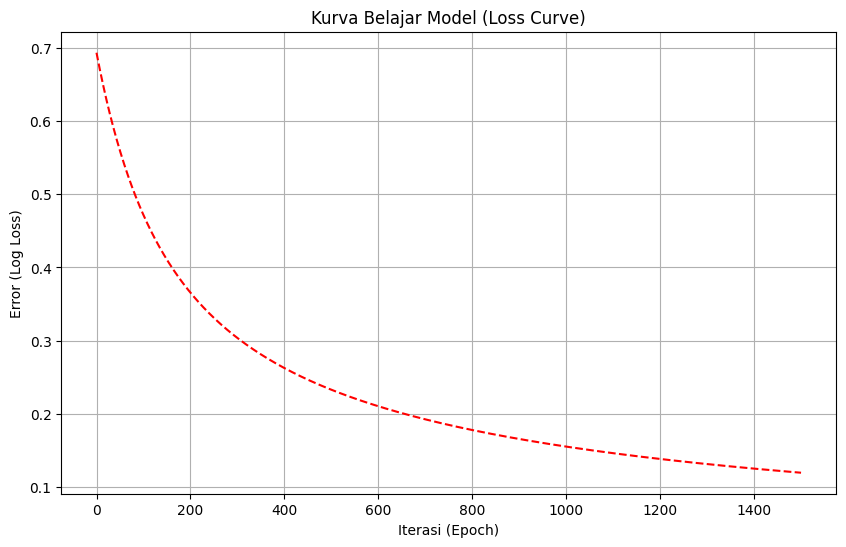

In [72]:
plt.figure(figsize=(10, 6))
plt.plot(loss_history, label='Training Loss', color='red', linestyle='--')
plt.title('Kurva Belajar Model (Loss Curve)')
plt.xlabel('Iterasi (Epoch)')
plt.ylabel('Error (Log Loss)')
plt.grid(True)
plt.show()

#### Accuracy Model

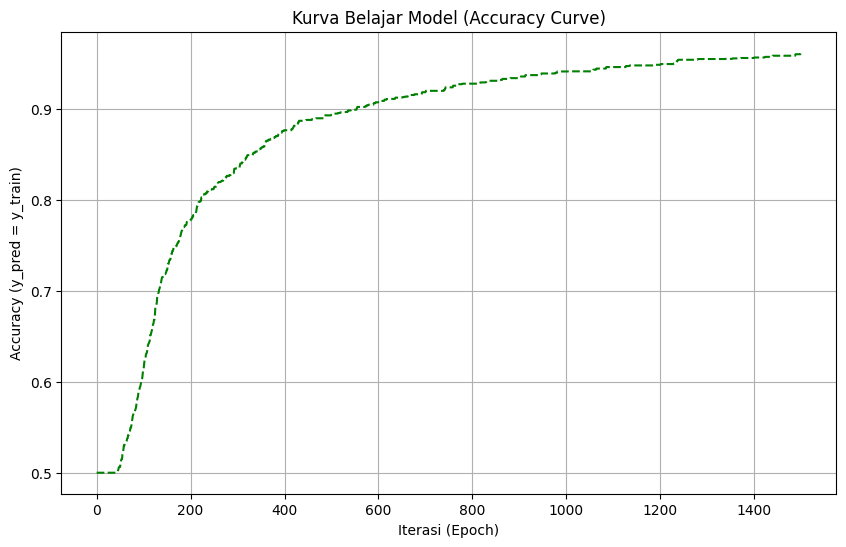

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(accuracy_history, label='Training Accuracy', color='green', linestyle='--')
plt.title('Kurva Belajar Model (Accuracy Curve)')
plt.xlabel('Iterasi (Epoch)')
plt.ylabel('Accuracy (y_pred = y_train)')
plt.grid(True)
plt.show()

### E.9 Logistic Regression Prediction

In [74]:
def predict(X, w, b, threshold=0.7):
    # 1. Hitung probabilitas
    z = linear_equation(X, w, b)
    y_prob = sigmoid(z)
    
    # 2. Ubah probabilitas jadi kelas (0 atau 1)
    y_class = [1 if p > threshold else 0 for p in y_prob]
    
    return np.array(y_class)

## F. Evaluasi

### F.1 Akurasi

In [75]:
predictions = predict(X_test_matrix, w, b)
akurasi_test = np.sum(predictions == y_test) / len(X_test_matrix)
print(f"{akurasi_test}")

0.9738625363020329


In [76]:
prediction_train = predict(X_train_matrix, w, b)
akurasi_train = np.sum(prediction_train == y_train) / len(X_train_matrix)
print(f"{akurasi_train}")

0.9620708748615725


### F.2 Confusion Matrix

In [77]:
TP = np.sum((predictions == 1) & (y_test == 1))
FP = np.sum((predictions == 1) & (y_test == 0))
TN = np.sum((predictions == 0) & (y_test == 0))
FN = np.sum((predictions == 0) & (y_test == 1))

print(f"True Positive: {TP}")
print(f"False Positive: {FP}")
print(f"True Negative: {TN}")
print(f"False Negative: {FN}")

True Positive: 106
False Positive: 4
True Negative: 900
False Negative: 23


### F.3 Precision

In [78]:
precision = TP / (TP + FP)
precision

np.float64(0.9636363636363636)

### F.4 Recall

In [79]:
recall = TP / (TP + FN)
recall

np.float64(0.8217054263565892)

### F.5 F-1 Score

In [80]:
f1 = 2 * (precision * recall) / (precision + recall)
f1

np.float64(0.8870292887029289)

### F.6 Visualisasi Sigmoid

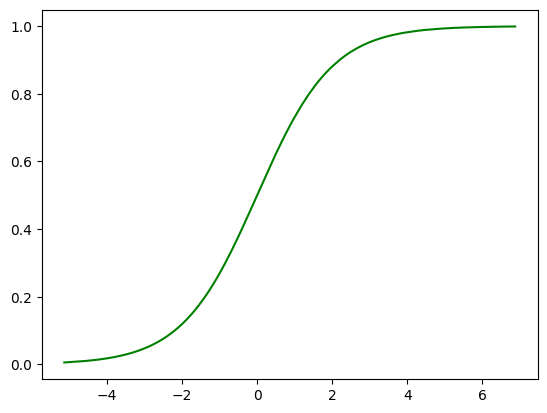

In [81]:
z_test = np.dot(X_test_matrix, w) + b
z_sort = np.sort(z_test)
z_sorted = sigmoid(z_sort)

plt.plot(z_sort, z_sorted, color='green')

## G. GUI

### G.1 Rumus Prediksi Yang Digunakan

#### Rumus TF - IDF

In [83]:
# # 1. Bikin Kamus
# vocab_index = build_vocabulary(X_train_clean)

# # 2. Hitung IDF
# idf_values = calculate_idf(X_train_clean, vocab_index)

# # 3. Hitung TF Train & Test
# tf_test = calculate_tf(X_test, vocab_index)

# # 4. Kalikan jadi TF-IDF Train & TF-IDF Test
# X_test_matrix = multiply_tf_idf(tf_test, vocab_index, idf_values)

# # 5. Normalisasi Input
# X_test_matrix = normalize_l2(X_test_matrix)

#### Rumus Logistic Regression

In [84]:
    # # 1. Hitung probabilitas (sama kayak waktu training)
    # z = linear_equation(X, w, b)
    # y_prob = sigmoid(z)
    
    # # 2. Ubah probabilitas jadi kelas (0 atau 1)
    # y_class = [1 if p > threshold else 0 for p in y_prob]

### G.2 GUI Tkinter

In [85]:
import tkinter as tk
from tkinter import * 

#FUNGSI PREDIKSI
def prediksi():
    teks_mentah = input_nama.get()
    if not teks_mentah: return

    input_series = pd.Series([teks_mentah])
    clean_series = preprocess_text(input_series)
    teks_bersih = clean_series.iloc[0] 
    input_list = [teks_bersih]
    
    tf_input = calculate_tf(input_list, vocab_index)

    tfidf_input = multiply_tf_idf(tf_input, vocab_index, idf_values)
    tfidf_input = normalize_l2(tfidf_input) 
    
    z = linear_equation(tfidf_input, w, b)
    y_prob = sigmoid(z)
    
    if y_prob > 0.7:
        hasil = "Spam"
        warna ="red"
    else:
        hasil = "Ham"
        warna = "green"
        
    hasil_prediksi.config(text=hasil, fg=warna)


# GUI UTAMA
root = tk.Tk()
root_title = Label(text='AI Spam/Ham Predictor - Email')
root.geometry("500x600")
root.configure(bg='lightblue')

header_frame = Frame(root, bg="#003468", pady=20)
header_frame.pack(fill='x')

Label(header_frame, text='Email Spam/Ham Predictor', font=('Arial', 18, 'bold'), bg='#003468', fg='white').pack()
Label(header_frame, text='Model: Logistic Regression + NLP (TF-IDF)', font=('Arial', 10), bg='#003468', fg='white').pack()

main_frame = Frame(root, bg="#086594", pady=20, padx=20)
main_frame.pack(fill='both', expand=True)

Label(main_frame, text='Masukkan Pesan Email: ', font=('Arial', 12), bg='#086594',fg='white').pack()
input_nama = Entry(main_frame, font=('Arial', 12), bg='white',fg="#000000", justify='center')
input_nama.pack(padx=10, pady=20)

predict = Button(main_frame, command=prediksi, bg="#002574", fg='white', text='Prediksi Pesan', font=('Arial', 14))
predict.pack(padx=30, pady=40)

hasil_prediksi = Label(root, text='-', font=('Arial', 14, 'bold'))
hasil_prediksi.pack(pady=40, padx=20)

root.mainloop()

## Kesimpulan

### Insight Analysis

#### Data overview


- Terdapat 415 data duplikat
- Tidak ada missing values
- Data class imbalanced

#### Preprocess data

- NLP workflow
- Drop columns duplicate
- Encoding categorical columns (Label spam / ham)

#### Exploratory data analysis

- Melihat persebaran columns Spam dengan kata "Call" yang paling sering muncul
- Melihat persebaran columns Ham dengan kata "Get" yang paling sering muncul

### Modelling Analysis

1. Count Vectorizer / TF-IDF / Word Embedding

2. Logistic Regression Threshold 0.7

3. Accuracy / Precision / Recall / F-1 Score

4. Sigmoid Preview